In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import chdir

In [228]:
chdir('/home/niang/Bureau/Scoring')

#### Importation de la base de donnée 2020

In [229]:
data_2019 = pd.read_table("base_telecom_2019_12.txt", encoding = "latin-1", sep =";")

/home/niang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [230]:
data_2019.shape

(46842, 42)

In [231]:
data_2019.head()

ID_CLIENT  FLAG_RESILIATION DATE_NAISSANCE      SEXE          CSP  \
0  ID_197510345046                 1     24/09/1978   Féminin  Sans emploi   
1  ID_335550354857                 1     20/10/1978  Masculin        Cadre   
2  ID_758842931436                 0     02/03/2000  Masculin      Employé   
3  ID_563487045264                 0     10/05/1978   Féminin      Employé   
4  ID_677162829357                 0     15/11/1939   Féminin  Sans emploi   

  CODE_POSTAL  TAILLE_VILLE    TYPE_VILLE  REVENU_MOYEN_VILLE DATE_ACTIVATION  \
0       78160       16715.0       Urbaine             24035.0      16/04/2017   
1       59400         515.0  Péri-urbaine             14152.0      09/11/2015   
2       02600        9839.0        Rurale             13648.0      27/10/2019   
3       21300       16174.0       Urbaine             10945.0      18/07/2015   
4       13260        8001.0  Péri-urbaine             21146.0      04/08/2015   

   ... FLAG_APPELS_VERS_INTERNATIONAL FLAG_APPELS_DEPUIS_INTERNATIONAL  \
0  ...                              1                                0   
1  ...                              0                                0   
2  ...                              1                                0   
3  ...                              1                                0   
4  ...                              0                                0   

   FLAG_APPELS_NUMEROS_SPECIAUX  NB_SMS_M6  NB_SMS_M5  NB_SMS_M4  NB_SMS_M3  \
0                             0         13         11         10        8.0   
1                             0          6          4          3        2.0   
2                             1        379        359        335      362.0   
3                             1         19         21         19       17.0   
4                             0          2          0          1        0.0   

   NB_SMS_M2  NB_SMS_M1  SEGMENT  
0          7          5        B  
1          0          0        B  
2        353        368        A  
3         19         16        A  
4          0          0        C  

[5 rows x 42 columns]

In [232]:
data_2019.columns

Index(['ID_CLIENT', 'FLAG_RESILIATION', 'DATE_NAISSANCE', 'SEXE', 'CSP',
       'CODE_POSTAL', 'TAILLE_VILLE', 'TYPE_VILLE', 'REVENU_MOYEN_VILLE',
       'DATE_ACTIVATION', 'ENSEIGNE', 'MODE_PAIEMENT', 'DUREE_OFFRE_INIT',
       'DUREE_OFFRE', 'NB_MIGRATIONS', 'FLAG_MIGRATION_HAUSSE',
       'FLAG_MIGRATION_BAISSE', 'NB_SERVICES',
       'FLAG_PERSONNALISATION_REPONDEUR', 'FLAG_TELECHARGEMENT_SONNERIE',
       'TELEPHONE_INIT', 'TELEPHONE', 'DATE_FIN_ENGAGEMENT',
       'NB_REENGAGEMENTS', 'DATE_DERNIER_REENGAGEMENT', 'SITUATION_IMPAYES',
       'VOL_APPELS_M6', 'VOL_APPELS_M5', 'VOL_APPELS_M4', 'VOL_APPELS_M3',
       'VOL_APPELS_M2', 'VOL_APPELS_M1', 'FLAG_APPELS_VERS_INTERNATIONAL',
       'FLAG_APPELS_DEPUIS_INTERNATIONAL', 'FLAG_APPELS_NUMEROS_SPECIAUX',
       'NB_SMS_M6', 'NB_SMS_M5', 'NB_SMS_M4', 'NB_SMS_M3', 'NB_SMS_M2',
       'NB_SMS_M1', 'SEGMENT'],
      dtype='object')

#### Conversion des variables dates en type date

In [233]:
from datetime import datetime

In [234]:
# conversion en type date
#data_2019["DATE_NAISSANCE"] = pd.to_datetime(data_2019['DATE_NAISSANCE'])
#data_2019["DATE_ACTIVATION"] = pd.to_datetime(data_2019['DATE_ACTIVATION'])
#data_2019["DATE_FIN_ENGAGEMENT"] = pd.to_datetime(data_2019['DATE_FIN_ENGAGEMENT'])
#data_2019["DATE_DERNIER_REENGAGEMENT"] = pd.to_datetime(data_2019['DATE_DERNIER_REENGAGEMENT'])

In [235]:
data_2019['DATE_NAISSANCE'] = data_2019['DATE_NAISSANCE'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
data_2019["DATE_ACTIVATION"] = data_2019['DATE_ACTIVATION'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
data_2019["DATE_FIN_ENGAGEMENT"] = data_2019['DATE_FIN_ENGAGEMENT'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
data_2019["DATE_DERNIER_REENGAGEMENT"] = data_2019['DATE_DERNIER_REENGAGEMENT'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))

In [236]:
data_2019.dtypes

ID_CLIENT                                   object
FLAG_RESILIATION                             int64
DATE_NAISSANCE                      datetime64[ns]
SEXE                                        object
CSP                                         object
CODE_POSTAL                                 object
TAILLE_VILLE                               float64
TYPE_VILLE                                  object
REVENU_MOYEN_VILLE                         float64
DATE_ACTIVATION                     datetime64[ns]
ENSEIGNE                                    object
MODE_PAIEMENT                               object
DUREE_OFFRE_INIT                           float64
DUREE_OFFRE                                float64
NB_MIGRATIONS                                int64
FLAG_MIGRATION_HAUSSE                        int64
FLAG_MIGRATION_BAISSE                        int64
NB_SERVICES                                  int64
FLAG_PERSONNALISATION_REPONDEUR              int64
FLAG_TELECHARGEMENT_SONNERIE   

### - Nettoyage des données

In [237]:
data_2019.isna().sum()

ID_CLIENT                               0
FLAG_RESILIATION                        0
DATE_NAISSANCE                         44
SEXE                                    7
CSP                                     0
CODE_POSTAL                             0
TAILLE_VILLE                         3636
TYPE_VILLE                           1992
REVENU_MOYEN_VILLE                   1992
DATE_ACTIVATION                         0
ENSEIGNE                                0
MODE_PAIEMENT                           0
DUREE_OFFRE_INIT                        0
DUREE_OFFRE                             0
NB_MIGRATIONS                           0
FLAG_MIGRATION_HAUSSE                   0
FLAG_MIGRATION_BAISSE                   0
NB_SERVICES                             0
FLAG_PERSONNALISATION_REPONDEUR         0
FLAG_TELECHARGEMENT_SONNERIE            0
TELEPHONE_INIT                          0
TELEPHONE                               0
DATE_FIN_ENGAGEMENT                   635
NB_REENGAGEMENTS                  

In [238]:
data_2019[data_2019["DATE_NAISSANCE"].isna()].head()

ID_CLIENT  FLAG_RESILIATION DATE_NAISSANCE      SEXE  \
160   ID_288519304613                 0            NaT   Féminin   
1879  ID_218534272964                 0            NaT  Masculin   
3938  ID_675143345154                 0            NaT   Féminin   
6314  ID_225983626547                 0            NaT  Masculin   
8241  ID_227970775463                 1            NaT   Féminin   

                CSP CODE_POSTAL  TAILLE_VILLE TYPE_VILLE  REVENU_MOYEN_VILLE  \
160         Employé       78390       12048.0    Urbaine             19758.0   
1879     Commerçant       91120       28989.0    Urbaine             20641.0   
3938          Autre       75011      148333.0    Urbaine             22205.0   
6314     Commerçant       91120       28989.0    Urbaine             20641.0   
8241  Fonctionnaire       92110       50359.0    Urbaine             12776.0   

     DATE_ACTIVATION  ... FLAG_APPELS_VERS_INTERNATIONAL  \
160       2019-09-18  ...                              0   
1879      2014-11-01  ...                              0   
3938      2017-07-29  ...                              0   
6314      2013-12-29  ...                              0   
8241      2017-02-17  ...                              1   

     FLAG_APPELS_DEPUIS_INTERNATIONAL  FLAG_APPELS_NUMEROS_SPECIAUX  \
160                                 0                             1   
1879                                0                             1   
3938                                0                             1   
6314                                0                             1   
8241                                1                             0   

      NB_SMS_M6  NB_SMS_M5  NB_SMS_M4  NB_SMS_M3  NB_SMS_M2  NB_SMS_M1  \
160         499        479        486      491.0        502        512   
1879          8          4          2        7.0          3          5   
3938        104        135        146      107.0        157        119   
6314          9          5          3        8.0          4          6   
8241         24         24         22       16.0         17         16   

      SEGMENT  
160         A  
1879        A  
3938        A  
6314        A  
8241        A  

[5 rows x 42 columns]

#### Suppression des dates de naissances manquantes

In [239]:
def drop_index(data, name_col, value):
    
    to_del = data[data[name_col].isin([value])].index.tolist()
    data = data.drop(to_del)
    return(data)

In [240]:
# suppression des individus qui ont des données maquantes pour la date de naissance
data_2019 = drop_index(data_2019, "DATE_NAISSANCE", "NaT")

In [241]:
data_2019[data_2019["SEXE"].isna()].head()

ID_CLIENT  FLAG_RESILIATION DATE_NAISSANCE SEXE  \
7069   ID_931814714257                 0     1961-03-27  NaN   
19918  ID_157463430966                 0     1961-03-09  NaN   
23920  ID_390440253210                 0     1978-01-13  NaN   
32634  ID_337590967323                 0     1978-09-05  NaN   
34194  ID_192751039654                 0     1962-09-13  NaN   

                       CSP CODE_POSTAL  TAILLE_VILLE TYPE_VILLE  \
7069   Profession libérale       75012      137110.0    Urbaine   
19918  Profession libérale       75012      137110.0    Urbaine   
23920           Commerçant       42230       10072.0    Urbaine   
32634           Commerçant       42230       10072.0    Urbaine   
34194  Profession libérale       75012      137110.0    Urbaine   

       REVENU_MOYEN_VILLE DATE_ACTIVATION  ... FLAG_APPELS_VERS_INTERNATIONAL  \
7069              22205.0      2016-01-21  ...                              1   
19918             22205.0      2016-01-03  ...                              1   
23920             12708.0      2019-01-18  ...                              0   
32634             12708.0      2019-03-14  ...                              0   
34194             22205.0      2017-07-09  ...                              1   

      FLAG_APPELS_DEPUIS_INTERNATIONAL  FLAG_APPELS_NUMEROS_SPECIAUX  \
7069                                 1                             1   
19918                                1                             1   
23920                                0                             0   
32634                                0                             0   
34194                                1                             1   

       NB_SMS_M6  NB_SMS_M5  NB_SMS_M4  NB_SMS_M3  NB_SMS_M2  NB_SMS_M1  \
7069           7          5          6        6.0          4          3   
19918          6          4          5        5.0          3          2   
23920        382        397        384      408.0        383        406   
32634         30         27         25       30.0         29         29   
34194         13         11         12       12.0         10          9   

       SEGMENT  
7069         A  
19918        A  
23920        A  
32634        A  
34194        A  

[5 rows x 42 columns]

#### Proportion des hommes et des femmes

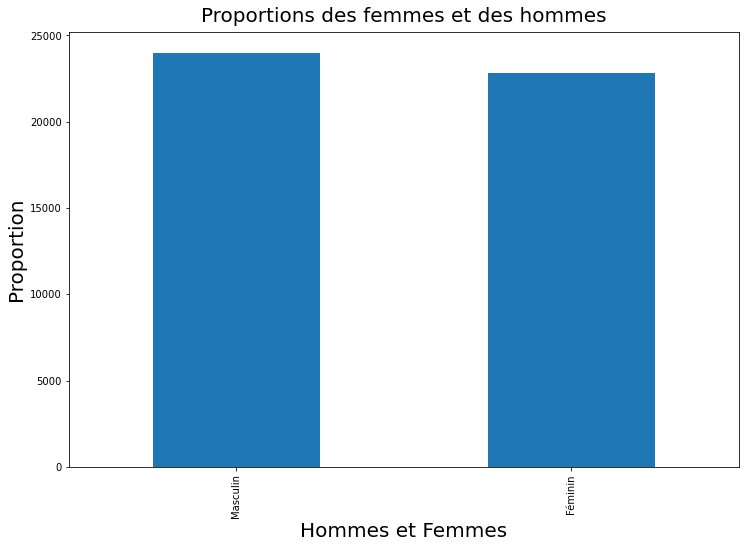

In [242]:
plt.figure(figsize=(12, 8))
data_2019["SEXE"].value_counts().plot(kind="bar")
plt.title("Proportions des femmes et des hommes", fontsize=20, pad=10)
plt.ylabel("Proportion", fontsize=20)
plt.xlabel("Hommes et Femmes", fontsize=20)
plt.show()

Ici on voit que les deux proportions sont presque les memes avec une légére supériorité pour les hommes. Puis que dans la variable "SEXE" on a 7 valeurs manquantes, on va remplacer par la catégorie masculin puisqu'elle domine ici. Toutefois on estime le critère "SEXE" n'apporte une grande différence.

#### imputation des individus qui ont des données maquantes pour le sexe par "masculin"

In [243]:
# imputation des individus qui ont des données maquantes pour le sexe par "masculin"
data_2019["SEXE"] = data_2019["SEXE"].fillna("Masculin")

In [244]:
data_2019[data_2019["NB_SMS_M3"].isna()].head(50)

ID_CLIENT  FLAG_RESILIATION DATE_NAISSANCE      SEXE  \
22    ID_991344601191                 0     1967-05-13  Masculin   
88    ID_946923849940                 1     1997-12-07  Masculin   
125   ID_297228928049                 0     1997-12-01  Masculin   
370   ID_701704203245                 0     1994-05-29  Masculin   
516   ID_112283712212                 0     1981-02-09   Féminin   
582   ID_735918041941                 0     1983-07-14   Féminin   
800   ID_611375063384                 0     1996-10-08   Féminin   
980   ID_339860362159                 0     1942-08-03  Masculin   
1063  ID_478323202524                 0     1997-06-26  Masculin   
1262  ID_467000662846                 0     1994-06-29   Féminin   
1436  ID_531494553821                 0     1997-03-08   Féminin   
1446  ID_655833440579                 0     1968-04-07  Masculin   
1455  ID_810762820165                 0     1996-02-29   Féminin   
1555  ID_125394939550                 1     1977-04-03   Féminin   
1671  ID_235944458580                 0     1958-04-22  Masculin   
1807  ID_849055301328                 0     1987-12-19  Masculin   
1851  ID_596377866760                 0     1997-07-03   Féminin   
1936  ID_333648219394                 0     1979-03-19  Masculin   
1990  ID_378756900262                 0     1977-11-30   Féminin   
2120  ID_275054219726                 0     1979-07-01  Masculin   
2164  ID_795564376142                 0     1974-03-25   Féminin   
2279  ID_308605259428                 0     1989-06-10   Féminin   
2332  ID_606297599387                 0     1984-05-02  Masculin   
2408  ID_533961984112                 0     1984-09-22  Masculin   
2753  ID_984351202186                 0     1989-08-10   Féminin   
2854  ID_633831630384                 0     1983-07-14   Féminin   
2867  ID_404049781758                 0     1976-08-11  Masculin   
2990  ID_961537250533                 1     1975-11-26  Masculin   
3575  ID_827872078273                 0     1990-11-17  Masculin   
3588  ID_996429742592                 1     1968-05-14  Masculin   
3763  ID_589941950231                 0     1979-04-28   Féminin   
3953  ID_746170796801                 0     1990-09-06  Masculin   
3954  ID_278171466281                 0     1996-05-31   Féminin   
4024  ID_666414031790                 1     1988-07-26  Masculin   
4058  ID_804558239553                 0     1973-05-17  Masculin   
4241  ID_120580123328                 0     1978-07-18  Masculin   
4389  ID_534827087044                 0     1997-09-03   Féminin   
5022  ID_458861624477                 1     1993-11-29  Masculin   
5044  ID_480595486183                 0     1968-12-11  Masculin   
5054  ID_930959228720                 0     1981-06-07  Masculin   
5107  ID_393191181679                 0     1992-03-20   Féminin   
5307  ID_737337626208                 1     1967-08-10  Masculin   
5356  ID_845764939136                 0     1989-05-10   Féminin   
5463  ID_961081331159                 0     1973-06-14  Masculin   
5502  ID_845492151354                 0     1971-01-04   Féminin   
6019  ID_655278026757                 0     1937-12-12   Féminin   
6086  ID_353846786336                 0     1957-03-15   Féminin   
6111  ID_233190880173                 0     1994-11-03   Féminin   
6364  ID_208993171439                 0     1963-04-18  Masculin   
6427  ID_940365615040                 0     1975-11-01  Masculin   

                      CSP CODE_POSTAL  TAILLE_VILLE    TYPE_VILLE  \
22                  Autre       45100      113078.0       Urbaine   
88               Etudiant       59800      184712.0       Urbaine   
125                 Autre       95140       40135.0       Urbaine   
370               Employé       31300       46196.0       Urbaine   
516           Sans emploi       02100       58993.0       Urbaine   
582               Employé       76450         518.0        Rurale   
800              Etudiant       33000      215780.0       Ur

In [245]:
# Ancieneté
referencedate = pd.to_datetime("2019-12-31", format="%Y-%m-%d",)
data_2019["ANCIENETE"] = referencedate - pd.DatetimeIndex(data_2019['DATE_ACTIVATION'])
data_2019["ANCIENETE"] = round(data_2019["ANCIENETE"]/np.timedelta64(1,'Y'), 2)

 

# Duree d'engagement
data_2019["DUREE_ENGAGEMT"] = referencedate - pd.DatetimeIndex(data_2019['DATE_FIN_ENGAGEMENT'])
data_2019["DUREE_ENGAGEMT"] = round(data_2019["DUREE_ENGAGEMT"]/np.timedelta64(1,'Y'), 2)

 

# ANCIENETE RE-ENGAGEMENT
data_2019["ANCI_REENGAGEMT"] = referencedate - pd.DatetimeIndex(data_2019['DATE_DERNIER_REENGAGEMENT'])
data_2019["ANCI_REENGAGEMT"] = round(data_2019["ANCI_REENGAGEMT"]/np.timedelta64(1,'Y'), 2)

 

# extraction de variables temps
#telco2019["AGE"] =  referencedate - pd.DatetimeIndex(telco2019['DATE_NAISSANCE'])
#telco2019["AGE"] =  round(telco2019["AGE"]/np.timedelta64(1,'Y'), 1)

 

# Volume Appels et SMS
#telco2019["VOL_APPELS"] = telco2019.iloc[:,26:32].sum(axis=1)
#telco2019["VOL_SMS"] = telco2019.iloc[:,35:41].sum(axis=1).astype(int) 

In [246]:
data_2019

ID_CLIENT  FLAG_RESILIATION DATE_NAISSANCE      SEXE  \
0      ID_197510345046                 1     1978-09-24   Féminin   
1      ID_335550354857                 1     1978-10-20  Masculin   
2      ID_758842931436                 0     2000-03-02  Masculin   
3      ID_563487045264                 0     1978-05-10   Féminin   
4      ID_677162829357                 0     1939-11-15   Féminin   
...                ...               ...            ...       ...   
46837  ID_602276660037                 0     1978-01-22   Féminin   
46838  ID_165945567035                 0     1966-11-13   Féminin   
46839  ID_956315616125                 0     1987-05-24  Masculin   
46840  ID_219216604307                 0     1984-10-28  Masculin   
46841  ID_166851802900                 0     1985-03-19   Féminin   

               CSP CODE_POSTAL  TAILLE_VILLE    TYPE_VILLE  \
0      Sans emploi       78160       16715.0       Urbaine   
1            Cadre       59400         515.0  Péri-urbaine   
2          Employé       02600        9839.0        Rurale   
3          Employé       21300       16174.0       Urbaine   
4      Sans emploi       13260        8001.0  Péri-urbaine   
...            ...         ...           ...           ...   
46837      Employé       13090      134207.0       Urbaine   
46838        Autre        6500       28746.0       Urbaine   
46839        Autre       78000       85677.0       Urbaine   
46840      Employé       81000       46282.0       Urbaine   
46841      Employé       95490       16241.0       Urbaine   

       REVENU_MOYEN_VILLE DATE_ACTIVATION  ... NB_SMS_M6 NB_SMS_M5  NB_SMS_M4  \
0                 24035.0      2017-04-16  ...        13        11         10   
1                 14152.0      2015-11-09  ...         6         4          3   
2                 13648.0      2019-10-27  ...       379       359        335   
3                 10945.0      2015-07-18  ...        19        21         19   
4                 21146.0      2015-08-04  ...         2         0          1   
...                   ...             ...  ...       ...       ...        ...   
46837             16075.0      2019-04-13  ...        33        31         36   
46838             13353.0      2013-12-10  ...        12        15         16   
46839             25361.0      2016-07-04  ...         9         7          5   
46840             13339.0      2017-05-19  ...         1         3          2   
46841             19522.0      2017-11-22  ...         3         4          2   

       NB_SMS_M3  NB_SMS_M2  NB_SMS_M1  SEGMENT  ANCIENETE  DUREE_ENGAGEMT  \
0            8.0          7          5        B       2.71           -0.16   
1            2.0          0          0        B       4.14            3.14   
2          362.0        353        368        A       0.18             NaN   
3           17.0         19         16        A       4.45           -1.01   
4            0.0          0          0        C       4.41           -0.82   
...          ...        ...        ...      ...        ...             ...   
46837       34.0         34         37        C       0.72           -0.79   
46838       20.0         19         22        A       6.06            0.11   
46839        7.0          6          5        A       3.49           -1.48   
46840        2.0          4          4        B       2.62            1.11   
46841        0.0          3          4        A       2.11           -1.77   

       ANCI_REENGAGEMT  
0                 1.84  
1                  NaN  
2                  NaN  
3                  NaN  
4                 0.18  
...                ...  
46837              NaN  
46838             2.11  
46839             0.52  
46840              NaN  
46841             0.24  

[46798 rows x 45 columns]

In [247]:
# ajouter une colonne représentant l'age
from datetime import datetime

def from_dob_to_age(col_date_de_naissance, date_base):
    
    col_age = []
    
    for date in data_2019[col_date_de_naissance]:
        dateString = date_base
        dateFormatter =  "%Y/%m/%d"
        date_of_base = datetime.strptime(dateString, dateFormatter)
        age = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))
        col_age.append(age)

    return(col_age)

In [248]:
data_2019["age"] = from_dob_to_age("DATE_NAISSANCE", "2019/12/31") # ajout de la colonne age

In [249]:
"""
def duree_reengagement(data, col_date_reengagement, date_base):
    
    for date in data_2019[col_date_reengagement]:

        dateString = date_base
        dateFormatter =  "%Y/%m/%d"
        date_of_base = datetime.strptime(dateString, dateFormatter)
        anciennete = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))
        data[col_date_reengagement] = data[col_date_reengagement].replace([date], anciennete)
            
    return(data)
"""

'\ndef duree_reengagement(data, col_date_reengagement, date_base):\n    \n    for date in data_2019[col_date_reengagement]:\n\n        dateString = date_base\n        dateFormatter =  "%Y/%m/%d"\n        date_of_base = datetime.strptime(dateString, dateFormatter)\n        anciennete = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))\n        data[col_date_reengagement] = data[col_date_reengagement].replace([date], anciennete)\n            \n    return(data)\n'

In [250]:
#b = duree_reengagement(data_2019, "DATE_DERNIER_REENGAGEMENT", "31/12/2019")

In [251]:
#b["DATE_DERNIER_REENGAGEMENT"]

In [252]:
"""
def anciennete(data, col_date_activation, date_base):
    
    for date in data_2019[col_date_activation]:


        dateString = date_base
        dateFormatter =  "%Y/%m/%d"
        date_of_base = datetime.strptime(dateString, dateFormatter)
        anciennete = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))
        data[col_date_activation] = data[col_date_activation].replace([date], np.round(anciennete, 2))
            
    return(data)
    
"""

'\ndef anciennete(data, col_date_activation, date_base):\n    \n    for date in data_2019[col_date_activation]:\n\n\n        dateString = date_base\n        dateFormatter =  "%Y/%m/%d"\n        date_of_base = datetime.strptime(dateString, dateFormatter)\n        anciennete = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))\n        data[col_date_activation] = data[col_date_activation].replace([date], np.round(anciennete, 2))\n            \n    return(data)\n    \n'

In [253]:
#data_2019 = anciennete(data_2019, "DATE_DERNIER_REENGAGEMENT", "2019/12/31")

In [254]:
#data_2019["duree_reengagement"] = list(data_2019["DATE_DERNIER_REENGAGEMENT"])

In [255]:
#data_2019["duree_reengagement"]

In [256]:
#data_2019 = anciennete(data_2019, "DATE_ACTIVATION", "2019/12/31")

In [257]:
#data_2019["anciennete"] = list(data_2019["DATE_ACTIVATION"])

In [258]:
def remplace_duree_reengagement(data , col):
    
    for valeur in data[col]:
        
        if np.isnan(valeur):
            
            data[col] = data[col].replace([valeur], 0.0)
            
    return(data)

In [259]:
data_2019 = remplace_duree_reengagement(data_2019, "ANCI_REENGAGEMT")
data_2019 = remplace_duree_reengagement(data_2019, "DUREE_ENGAGEMT")

On a des variables manquantes au nombre de 443 pour la variables "NB_SMS_M3". Cependant, nous jugeons que le mieux c'est de remplacer les valeurs manquantes car elle peut etre importante dans la modèlisation et le fait de la suuprimer pourrait ou de supprimer ces individus nous faire perdre des informations importantes. On remarque les individus gardent une constance sur le nombre de sms envoyé durant les 6 mois, donc on peut imputer les valeurs manquantes par la moyennes des sms sur ces mois pour chaque individus

#### Remplacement des nan dans la variable "NB_SMS_M3" par la moyenne des sms sur les 6 mois

In [260]:

moyenne_nb_sms = round(data_2019[data_2019.columns[35:41]].mean(axis=1), 1)

#data_2019["NB_SMS_M3"] = data_2019["NB_SMS_M3"].fillna(data_2019[data_2019.columns[35:41]].mean(axis=1))

In [261]:
# fonctions qui effectue cette imputation

def imputation_nb_sms_m3(data, col_imputation, moyenne_sms):
    
    index = data.index

    for (index, value) in zip(index,data[col_imputation]):
    
        if np.isnan(value):
            data[col_imputation] = data[col_imputation].replace([value], moyenne_sms[index])
            
    return(data)

In [262]:
data_2019 = imputation_nb_sms_m3(data_2019, "NB_SMS_M3", moyenne_nb_sms)

#### Suppression des valeurs manquantes pour la variable "TAILLE_VILLE"

In [263]:
def drop_index_2(data, name_col):
    
    to_del = data[data[name_col].isnull()].index
    data = data.drop(to_del)
    return(data)

In [264]:
data_2019 = drop_index_2(data_2019, "TAILLE_VILLE")

In [265]:
"""

date = data_2019["DATE_DERNIER_REENGAGEMENT"][4]

dateString = "31/12/2019"
dateFormatter =  "%d/%m/%Y"
date_of_base = datetime.strptime(dateString, dateFormatter)
anciennete = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))
anciennete

"""

'\n\ndate = data_2019["DATE_DERNIER_REENGAGEMENT"][4]\n\ndateString = "31/12/2019"\ndateFormatter =  "%d/%m/%Y"\ndate_of_base = datetime.strptime(dateString, dateFormatter)\nanciennete = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))\nanciennete\n\n'

In [266]:
#data_2019["DATE_DERNIER_REENGAGEMENT"][4]

In [267]:
data_2019.isna().sum()

ID_CLIENT                               0
FLAG_RESILIATION                        0
DATE_NAISSANCE                          0
SEXE                                    0
CSP                                     0
CODE_POSTAL                             0
TAILLE_VILLE                            0
TYPE_VILLE                              0
REVENU_MOYEN_VILLE                      0
DATE_ACTIVATION                         0
ENSEIGNE                                0
MODE_PAIEMENT                           0
DUREE_OFFRE_INIT                        0
DUREE_OFFRE                             0
NB_MIGRATIONS                           0
FLAG_MIGRATION_HAUSSE                   0
FLAG_MIGRATION_BAISSE                   0
NB_SERVICES                             0
FLAG_PERSONNALISATION_REPONDEUR         0
FLAG_TELECHARGEMENT_SONNERIE            0
TELEPHONE_INIT                          0
TELEPHONE                               0
DATE_FIN_ENGAGEMENT                   586
NB_REENGAGEMENTS                  

#### Création de variables

In [268]:
!pip install optbinning

In [269]:
x = data_2019["TAILLE_VILLE"]
y = data_2019["FLAG_RESILIATION"]

from optbinning import OptimalBinning
optb = OptimalBinning(name="TAILLE_VILLE", dtype="numerical", solver="cp")
optb.fit(x, y)

OptimalBinning(name='TAILLE_VILLE')

In [270]:
 optb.binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0             [-inf, 1415.50)   3640   0.084331       2694    946    0.259890   
1          [1415.50, 2687.00)   2461   0.057016       1930    531    0.215766   
2          [2687.00, 6497.50)   4867   0.112759       3875    992    0.203822   
3         [6497.50, 16037.00)   5842   0.135347       4686   1156    0.197877   
4        [16037.00, 67027.50)  14830   0.343581      12328   2502    0.168712   
5       [67027.50, 156828.00)   6089   0.141070       5066   1023    0.168008   
6            [156828.00, inf)   5434   0.125895       4623    811    0.149245   
7                     Special      0   0.000000          0      0    0.000000   
8                     Missing      0   0.000000          0      0    0.000000   
Totals                         43163   1.000000      35202   7961    0.184440   

              WoE        IV        JS  
0       -0.440008  0.018612  0.002308  
1       -0.196035  0.002328  0.000290  
2        -0.12397  0.001801  0.000225  
3      -0.0869347  0.001051  0.000131  
4        0.108234  0.003888  0.000486  
5        0.113264  0.001745  0.000218  
6        0.253983  0.007481  0.000933  
7               0  0.000000  0.000000  
8               0  0.000000  0.000000  
Totals             0.036907  0.004591

In [271]:
data_2019["moyenne_nb_sms_6_mois"] = moyenne_nb_sms # moyenne sms sur les 6 mois

In [272]:
moyenne_vol_appels_6_mois = round(data_2019[data_2019.columns[26:32]].mean(axis=1), 1) # moyennes volumes appels sur les 6 mois

In [273]:
data_2019["moyenne_vols_appels_6_mois"] = moyenne_vol_appels_6_mois

In [274]:
#data_2019[data_2019["CODE_POSTAL"] == 80000]

Pour les données manquantes sur les variables "TAILLE_VILLE", "TYPE_VILLE" et "REVENU_MOYEN_VILLE", on peut bien voir que leurs code postal figure sur d'autres individus qui n'ont pas de variables manquantes, de ce fait elles auront les memes vaaleurs car le code postal est unique

#### Remplacement des variables manquantes sur les variables "TAILLE_VILLE", "TYPE_VILLE" et "REVENU_MOYEN_VILLE"

Je vais écrire une fonction qui va regarder pour les valeurs manquantes les individus qui ont le meme code postal et remplacer les memes valeurs pour ces variables

In [275]:
#data_2019["TAILLE_VILLE"].replace(data_2019["TAILLE_VILLE"].isnull(), "null", inplace=True)

In [276]:
data_2019.dtypes

ID_CLIENT                                   object
FLAG_RESILIATION                             int64
DATE_NAISSANCE                      datetime64[ns]
SEXE                                        object
CSP                                         object
CODE_POSTAL                                 object
TAILLE_VILLE                               float64
TYPE_VILLE                                  object
REVENU_MOYEN_VILLE                         float64
DATE_ACTIVATION                     datetime64[ns]
ENSEIGNE                                    object
MODE_PAIEMENT                               object
DUREE_OFFRE_INIT                           float64
DUREE_OFFRE                                float64
NB_MIGRATIONS                                int64
FLAG_MIGRATION_HAUSSE                        int64
FLAG_MIGRATION_BAISSE                        int64
NB_SERVICES                                  int64
FLAG_PERSONNALISATION_REPONDEUR              int64
FLAG_TELECHARGEMENT_SONNERIE   

In [277]:
"""
def imputation_ville(data, col_imputation):
    
    data_not_na = data[data[col_imputation].isna() == False]# nous garddons d'abord les individus sans na pour 
                                                            # pouvoir faire la comparaison avec le code postal
    
 
    for index_1, (code_postal_1, value) in enumerate((zip(data["CODE_POSTAL"],data[col_imputation]))):
        
        if pd.isnull(value): 
            
            index = data_not_na[data_not_na["CODE_POSTAL"] == code_postal_1].index

            #data[col_imputation].replace([value], data_not_na[col_imputation][index[0]], inplace = True)
            
            try:
                
                data.at[index_1, col_imputation] = data_not_na[col_imputation][index[0]]
            
            except IndexError:
                
                data = data.drop(index_1)
    
            
    return(data)
"""

'\ndef imputation_ville(data, col_imputation):\n    \n    data_not_na = data[data[col_imputation].isna() == False]# nous garddons d\'abord les individus sans na pour \n                                                            # pouvoir faire la comparaison avec le code postal\n    \n \n    for index_1, (code_postal_1, value) in enumerate((zip(data["CODE_POSTAL"],data[col_imputation]))):\n        \n        if pd.isnull(value): \n            \n            index = data_not_na[data_not_na["CODE_POSTAL"] == code_postal_1].index\n\n            #data[col_imputation].replace([value], data_not_na[col_imputation][index[0]], inplace = True)\n            \n            try:\n                \n                data.at[index_1, col_imputation] = data_not_na[col_imputation][index[0]]\n            \n            except IndexError:\n                \n                data = data.drop(index_1)\n    \n            \n    return(data)\n'

In [278]:
#data_2019["REVENU_MOYEN_VILLE"] = data_2019["REVENU_MOYEN_VILLE"].dropna()

In [279]:
#my_data.head(59)

In [280]:
data_2019.head()

ID_CLIENT  FLAG_RESILIATION DATE_NAISSANCE      SEXE          CSP  \
0  ID_197510345046                 1     1978-09-24   Féminin  Sans emploi   
1  ID_335550354857                 1     1978-10-20  Masculin        Cadre   
2  ID_758842931436                 0     2000-03-02  Masculin      Employé   
3  ID_563487045264                 0     1978-05-10   Féminin      Employé   
4  ID_677162829357                 0     1939-11-15   Féminin  Sans emploi   

  CODE_POSTAL  TAILLE_VILLE    TYPE_VILLE  REVENU_MOYEN_VILLE DATE_ACTIVATION  \
0       78160       16715.0       Urbaine             24035.0      2017-04-16   
1       59400         515.0  Péri-urbaine             14152.0      2015-11-09   
2       02600        9839.0        Rurale             13648.0      2019-10-27   
3       21300       16174.0       Urbaine             10945.0      2015-07-18   
4       13260        8001.0  Péri-urbaine             21146.0      2015-08-04   

   ... NB_SMS_M3 NB_SMS_M2  NB_SMS_M1  SEGMENT  ANCIENETE  DUREE_ENGAGEMT  \
0  ...       8.0         7          5        B       2.71           -0.16   
1  ...       2.0         0          0        B       4.14            3.14   
2  ...     362.0       353        368        A       0.18            0.00   
3  ...      17.0        19         16        A       4.45           -1.01   
4  ...       0.0         0          0        C       4.41           -0.82   

   ANCI_REENGAGEMT  age  moyenne_nb_sms_6_mois  moyenne_vols_appels_6_mois  
0             1.84   41                    9.0                     11558.8  
1             0.00   41                    2.5                     14284.8  
2             0.00   19                  359.3                     28933.2  
3             0.00   41                   18.5                      5768.8  
4             0.18   80                    0.5                      8117.2  

[5 rows x 48 columns]

In [281]:
count_no_resilie = len(data_2019[data_2019['FLAG_RESILIATION']==0])
count_resilie= len(data_2019[data_2019['FLAG_RESILIATION']==1])
pct_of_no_resilie = count_no_resilie/(count_no_resilie+count_resilie)
print("pourcentage de non résilié est ", pct_of_no_resilie*100)
pct_of_resilie = count_resilie/(count_no_resilie+count_resilie)
print("pourcentage de résilié est", pct_of_resilie*100)

pourcentage de non résilié est  81.55596228251049
pourcentage de résilié est 18.44403771748952


Nos classes sont déséquilibrées, et le rapport entre les instances des réiliés et les instances des non résiliés est de 82/18. Avant de procéder à l'équilibrage des classes, faisons un peu plus d'exploration.

In [282]:
""""
var_cat=['CSP','TYPE_VILLE','FLAG_APPELS_VERS_INTERNATIONAL','FLAG_APPELS_DEPUIS_INTERNATIONAL','FLAG_APPELS_NUMEROS_SPECIAUX','SEGMENT']
for var in var_cat:
    #list_cat='var'+'_'+var
    list_cat = pd.get_dummies(data_2019[var])
    my_data=data_2019.join(list_cat)
    data_2019 = my_data
var_cat=['CSP', 'TYPE_VILLE','FLAG_APPELS_VERS_INTERNATIONAL','FLAG_APPELS_DEPUIS_INTERNATIONAL','FLAG_APPELS_NUMEROS_SPECIAUX','SEGMENT']
data_vars=data_2019.columns.values.tolist()
to_keep=[i for i in data_vars if i not in var_cat]
"""

'"\nvar_cat=[\'CSP\',\'TYPE_VILLE\',\'FLAG_APPELS_VERS_INTERNATIONAL\',\'FLAG_APPELS_DEPUIS_INTERNATIONAL\',\'FLAG_APPELS_NUMEROS_SPECIAUX\',\'SEGMENT\']\nfor var in var_cat:\n    #list_cat=\'var\'+\'_\'+var\n    list_cat = pd.get_dummies(data_2019[var])\n    my_data=data_2019.join(list_cat)\n    data_2019 = my_data\nvar_cat=[\'CSP\', \'TYPE_VILLE\',\'FLAG_APPELS_VERS_INTERNATIONAL\',\'FLAG_APPELS_DEPUIS_INTERNATIONAL\',\'FLAG_APPELS_NUMEROS_SPECIAUX\',\'SEGMENT\']\ndata_vars=data_2019.columns.values.tolist()\nto_keep=[i for i in data_vars if i not in var_cat]\n'

In [283]:
#dummies = pd.get_dummies(data_2019['TYPE_VILLE'])
data_2019.dtypes

ID_CLIENT                                   object
FLAG_RESILIATION                             int64
DATE_NAISSANCE                      datetime64[ns]
SEXE                                        object
CSP                                         object
CODE_POSTAL                                 object
TAILLE_VILLE                               float64
TYPE_VILLE                                  object
REVENU_MOYEN_VILLE                         float64
DATE_ACTIVATION                     datetime64[ns]
ENSEIGNE                                    object
MODE_PAIEMENT                               object
DUREE_OFFRE_INIT                           float64
DUREE_OFFRE                                float64
NB_MIGRATIONS                                int64
FLAG_MIGRATION_HAUSSE                        int64
FLAG_MIGRATION_BAISSE                        int64
NB_SERVICES                                  int64
FLAG_PERSONNALISATION_REPONDEUR              int64
FLAG_TELECHARGEMENT_SONNERIE   

In [284]:
cat_vars= ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_2019[var], prefix=var)
    data1 = data_2019.join(cat_list)
    data_2019 = data1
cat_vars = ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]
data_vars = data_2019.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [285]:
data_final=data_2019[to_keep]

In [286]:
data_final

ID_CLIENT  FLAG_RESILIATION DATE_NAISSANCE      SEXE CODE_POSTAL  \
0      ID_197510345046                 1     1978-09-24   Féminin       78160   
1      ID_335550354857                 1     1978-10-20  Masculin       59400   
2      ID_758842931436                 0     2000-03-02  Masculin       02600   
3      ID_563487045264                 0     1978-05-10   Féminin       21300   
4      ID_677162829357                 0     1939-11-15   Féminin       13260   
...                ...               ...            ...       ...         ...   
46837  ID_602276660037                 0     1978-01-22   Féminin       13090   
46838  ID_165945567035                 0     1966-11-13   Féminin        6500   
46839  ID_956315616125                 0     1987-05-24  Masculin       78000   
46840  ID_219216604307                 0     1984-10-28  Masculin       81000   
46841  ID_166851802900                 0     1985-03-19   Féminin       95490   

       TAILLE_VILLE  REVENU_MOYEN_VILLE DATE_ACTIVATION  DUREE_OFFRE_INIT  \
0           16715.0             24035.0      2017-04-16               4.0   
1             515.0             14152.0      2015-11-09               4.0   
2            9839.0             13648.0      2019-10-27               4.0   
3           16174.0             10945.0      2015-07-18               2.0   
4            8001.0             21146.0      2015-08-04               2.0   
...             ...                 ...             ...               ...   
46837      134207.0             16075.0      2019-04-13               0.5   
46838       28746.0             13353.0      2013-12-10               2.0   
46839       85677.0             25361.0      2016-07-04               3.0   
46840       46282.0             13339.0      2017-05-19               4.0   
46841       16241.0             19522.0      2017-11-22               4.0   

       DUREE_OFFRE  ...  TELEPHONE_INIT_Bas de gamme  \
0              2.0  ...                            0   
1              2.0  ...                            0   
2              6.0  ...                            0   
3              3.0  ...                            1   
4              2.0  ...                            1   
...            ...  ...                          ...   
46837          0.5  ...                            0   
46838          3.0  ...                            0   
46839          3.0  ...                            0   
46840          2.0  ...                            0   
46841          4.0  ...                            0   

       TELEPHONE_INIT_Carte SIM seule  TELEPHONE_INIT_Haut de gamme  \
0                                   1                             0   
1                                   0                             0   
2                                   0                             1   
3                                   0                             0   
4                                   0                             0   
...                               ...                           ...   
46837                               0                             1   
46838                               0                             1   
46839                               0                             0   
46840                               0                             0   
46841                               1                             0   

       TELEPHONE_INIT_Milieu de gamme  TELEPHONE_Bas de gamme  \
0                                   0                       0   
1                                   1                       1   
2                                   0                       0   
3                                   0                       0   
4                                   0                       0   
...                               ...                     ...   
46837                               0                       0   
46838                               0                       0   
4683

In [287]:
del data_final["DATE_NAISSANCE"]

In [288]:
del data_final["DATE_ACTIVATION"]

In [289]:
del data_final["DATE_FIN_ENGAGEMENT"]

In [290]:
del data_final["DATE_DERNIER_REENGAGEMENT"]

In [291]:
del data_final["CODE_POSTAL"]

In [292]:
del data_final["SEXE"]

In [1890]:
"""
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

name_col = ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]

for col in name_col:
    
    data_2019[col] = labelencoder.fit_transform(data_2019[col])

data_2019.head()
"""

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlabelencoder = LabelEncoder()\n\nname_col = ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]\n\nfor col in name_col:\n    \n    data_2019[col] = labelencoder.fit_transform(data_2019[col])\n\ndata_2019.head()\n'

In [293]:
data_final.head()

ID_CLIENT  FLAG_RESILIATION  TAILLE_VILLE  REVENU_MOYEN_VILLE  \
0  ID_197510345046                 1       16715.0             24035.0   
1  ID_335550354857                 1         515.0             14152.0   
2  ID_758842931436                 0        9839.0             13648.0   
3  ID_563487045264                 0       16174.0             10945.0   
4  ID_677162829357                 0        8001.0             21146.0   

   DUREE_OFFRE_INIT  DUREE_OFFRE  NB_MIGRATIONS  FLAG_MIGRATION_HAUSSE  \
0               4.0          2.0              1                      0   
1               4.0          2.0              1                      0   
2               4.0          6.0              2                      1   
3               2.0          3.0              3                      1   
4               2.0          2.0              0                      0   

   FLAG_MIGRATION_BAISSE  NB_SERVICES  ...  TELEPHONE_INIT_Bas de gamme  \
0                      1            3  ...                            0   
1                      1            1  ...                            0   
2                      0            6  ...                            0   
3                      1            4  ...                            1   
4                      0            2  ...                            1   

   TELEPHONE_INIT_Carte SIM seule  TELEPHONE_INIT_Haut de gamme  \
0                               1                             0   
1                               0                             0   
2                               0                             1   
3                               0                             0   
4                               0                             0   

   TELEPHONE_INIT_Milieu de gamme  TELEPHONE_Bas de gamme  \
0                               0                       0   
1                               1                       1   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   TELEPHONE_Haut de gamme  TELEPHONE_Milieu de gamme  \
0                        0                          1   
1                        0                          0   
2                        1                          0   
3                        0                          1   
4                        0                          1   

   SITUATION_IMPAYES_A été en impayé  SITUATION_IMPAYES_Aucun impayé  \
0                                  0                               1   
1                                  0                               1   
2                                  0                               0   
3                                  0                               0   
4                                  0                               1   

   SITUATION_IMPAYES_Est en impayé  
0                                0  
1                                0  
2                                1  
3                                1  
4                                0  

[5 rows x 65 columns]

In [1668]:
#data_2019.set_index('ID_CLIENT', inplace=True)

In [1794]:
#data_2019.head()

In [294]:
#!pip3 install imblearn
!pip3 install imbalanced-learn

In [295]:
!pip install imblearn

In [296]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /home/niang/anaconda3/lib/python3.8/site-packages (0.8.0)


In [297]:
!pip install Tensorflow

#### Rééchantillonnage des sonnées

In [298]:
from imblearn.over_sampling import SMOTE

In [299]:
os = SMOTE(random_state=0)

In [300]:
X = data_final.loc[:, data_final.columns != 'FLAG_RESILIATION']
y = data_final.loc[:, data_final.columns == 'FLAG_RESILIATION']

In [301]:
X = X.loc[:, X.columns != 'ID_CLIENT']

In [302]:
print(X.shape)

(43163, 63)


In [303]:
print(y.shape)

(43163, 1)


In [304]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [305]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

In [306]:
os_data_X.head()

TAILLE_VILLE  REVENU_MOYEN_VILLE  DUREE_OFFRE_INIT  DUREE_OFFRE  \
0         569.0             18513.0               4.0          2.0   
1         275.0             11864.0               2.0          3.0   
2       20544.0             11562.0               4.0          4.0   
3       28938.0             11843.0               3.0          3.0   
4       30690.0             16428.0               2.0          8.0   

   NB_MIGRATIONS  FLAG_MIGRATION_HAUSSE  FLAG_MIGRATION_BAISSE  NB_SERVICES  \
0              1                      0                      1            3   
1              1                      1                      0            1   
2              0                      0                      0            2   
3              0                      0                      0            2   
4              3                      1                      0            2   

   FLAG_PERSONNALISATION_REPONDEUR  FLAG_TELECHARGEMENT_SONNERIE  ...  \
0                                0                             0  ...   
1                                0                             0  ...   
2                                0                             1  ...   
3                                0                             0  ...   
4                                0                             0  ...   

   TELEPHONE_INIT_Bas de gamme  TELEPHONE_INIT_Carte SIM seule  \
0                            1                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   TELEPHONE_INIT_Haut de gamme  TELEPHONE_INIT_Milieu de gamme  \
0                             0                               0   
1                             0                               1   
2                             0                               1   
3                             1                               0   
4                             1                               0   

   TELEPHONE_Bas de gamme  TELEPHONE_Haut de gamme  TELEPHONE_Milieu de gamme  \
0                       0                        0                          1   
1                       0                        0                          1   
2                       0                        0                          1   
3                       0                        1                          0   
4                       0                        1                          0   

   SITUATION_IMPAYES_A été en impayé  SITUATION_IMPAYES_Aucun impayé  \
0                                  0                               1   
1                                  1                               0   
2                                  0                               1   
3                                  0                               1   
4                                  1                               0   

   SITUATION_IMPAYES_Est en impayé  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 63 columns]

In [307]:
os_data_X.shape

(49348, 63)

In [308]:
os_data_y.shape

(49348, 1)

In [309]:
os_data_y['FLAG_RESILIATION'].value_counts() # Base équilibrée

1    24674
0    24674
Name: FLAG_RESILIATION, dtype: int64

In [310]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['FLAG_RESILIATION'])

In [1975]:
#data_final_vars=data_final.columns.values.tolist()
#y=['FLAG_RESILIATION']
#X=[i for i in data_final_vars if i not in y]

#### Selection de variables

In [1976]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

/home/niang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/niang/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/niang/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATI

In [1977]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False  True  True False False
 False False False False False False False  True False False False False
 False False  True  True False False False False False False False False
  True False  True  True False False False False False  True  True False
  True  True  True  True False False False False False  True  True  True
  True False  True]
[42 37 11  7 27 33  1 12  1  1 18 40 39 41 38 36 35 26 16  1 22 28 29 31
 25 21  1  1  6 32 30 34 15 19  9  2  1 20  1  1  8  5  3 24 23  1  1 43
  1  1  1  1 44 14  4 13 17  1  1  1  1 10  1]


In [1978]:
os_data_X.columns

Index(['TAILLE_VILLE', 'REVENU_MOYEN_VILLE', 'DUREE_OFFRE_INIT', 'DUREE_OFFRE',
       'NB_MIGRATIONS', 'FLAG_MIGRATION_HAUSSE', 'FLAG_MIGRATION_BAISSE',
       'NB_SERVICES', 'FLAG_PERSONNALISATION_REPONDEUR',
       'FLAG_TELECHARGEMENT_SONNERIE', 'NB_REENGAGEMENTS', 'VOL_APPELS_M6',
       'VOL_APPELS_M5', 'VOL_APPELS_M4', 'VOL_APPELS_M3', 'VOL_APPELS_M2',
       'VOL_APPELS_M1', 'FLAG_APPELS_VERS_INTERNATIONAL',
       'FLAG_APPELS_DEPUIS_INTERNATIONAL', 'FLAG_APPELS_NUMEROS_SPECIAUX',
       'NB_SMS_M6', 'NB_SMS_M5', 'NB_SMS_M4', 'NB_SMS_M3', 'NB_SMS_M2',
       'NB_SMS_M1', 'ANCIENETE', 'DUREE_ENGAGEMT', 'ANCI_REENGAGEMT', 'age',
       'moyenne_nb_sms_6_mois', 'moyenne_vols_appels_6_mois', 'CSP_Autre',
       'CSP_Cadre', 'CSP_Commerçant', 'CSP_Employé', 'CSP_Etudiant',
       'CSP_Fonctionnaire', 'CSP_Profession libérale', 'CSP_Sans emploi',
       'TYPE_VILLE_Multipolarisée', 'TYPE_VILLE_Péri-urbaine',
       'TYPE_VILLE_Rurale', 'TYPE_VILLE_Urbaine', 'ENSEIGNE_Boutique',
    

In [1979]:
#colonne = ["ENSEIGNE", "MODE_PAIEMENT", "DUREE_OFFRE_INIT", "DUREE_OFFRE", "FLAG_MIGRATION_BAISSE", "FLAG_PERSONNALISATION_REPONDEUR",
         # "FLAG_TELECHARGEMENT_SONNERIE", "FLAG_APPELS_VERS_INTERNATIONAL", "FLAG_APPELS_NUMEROS_SPECIAUX", "SEGMENT", "ANCIENETE", "DUREE_ENGAGEMT",
          #"ANCI_REENGAGEMT", "Commerçant", "Employé", "Etudiant", "Profession libérale", "Péri-urbaine", "Urbaine"]

In [1980]:
colonne = ["FLAG_MIGRATION_BAISSE","FLAG_PERSONNALISATION_REPONDEUR","FLAG_TELECHARGEMENT_SONNERIE","FLAG_APPELS_NUMEROS_SPECIAUX",
          "ANCIENETE", "DUREE_ENGAGEMT", "CSP_Etudiant", "CSP_Profession libérale", "CSP_Sans emploi", "ENSEIGNE_Grande distribution",
          "ENSEIGNE_Internet", "MODE_PAIEMENT_TIP", "MODE_PAIEMENT_Virement", "SEGMENT_A", "SEGMENT_B", "TELEPHONE_Milieu de gamme","SITUATION_IMPAYES_A été en impayé",
          "SITUATION_IMPAYES_Aucun impayé", "SITUATION_IMPAYES_Est en impayé"]

In [1981]:
X=os_data_X[colonne]
y=os_data_y['FLAG_RESILIATION']

In [1982]:
X.shape

(49348, 19)

In [1983]:
from sklearn import metrics
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression()

In [1984]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [1985]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      7376
           1       0.77      0.79      0.78      7429

    accuracy                           0.78     14805
   macro avg       0.78      0.78      0.78     14805
weighted avg       0.78      0.78      0.78     14805



In [1986]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5643 1733]
 [1579 5850]]


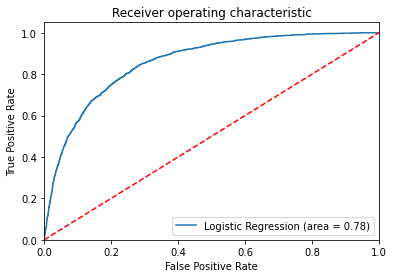

In [1987]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Appliquons sur la base 2020

In [191]:
data_2020 = pd.read_table("base_telecom_2020_03.txt", encoding = "latin-1", sep =";")

/home/niang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [192]:
data_2020.shape

(20215, 41)

In [193]:
data_2020.isna().sum()

ID_CLIENT                              0
DATE_NAISSANCE                        16
SEXE                                   3
CSP                                    0
CODE_POSTAL                            0
TAILLE_VILLE                        1571
TYPE_VILLE                           884
REVENU_MOYEN_VILLE                   884
DATE_ACTIVATION                        0
ENSEIGNE                               0
MODE_PAIEMENT                          0
DUREE_OFFRE_INIT                       0
DUREE_OFFRE                            0
NB_MIGRATIONS                          0
FLAG_MIGRATION_HAUSSE                  0
FLAG_MIGRATION_BAISSE                  0
NB_SERVICES                            0
FLAG_PERSONNALISATION_REPONDEUR        0
FLAG_TELECHARGEMENT_SONNERIE           0
TELEPHONE_INIT                         0
TELEPHONE                              0
DATE_FIN_ENGAGEMENT                  256
NB_REENGAGEMENTS                       0
DATE_DERNIER_REENGAGEMENT           9729
SITUATION_IMPAYE

In [194]:
data_2020['DATE_NAISSANCE'] = data_2020['DATE_NAISSANCE'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
data_2020["DATE_ACTIVATION"] = data_2020['DATE_ACTIVATION'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
data_2020["DATE_FIN_ENGAGEMENT"] = data_2020['DATE_FIN_ENGAGEMENT'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
data_2020["DATE_DERNIER_REENGAGEMENT"] = data_2020['DATE_DERNIER_REENGAGEMENT'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))

In [195]:
# suppression des individus qui ont des données maquantes pour la date de naissance
data_2020 = drop_index(data_2020, "DATE_NAISSANCE", "NaT")

In [196]:
# imputation des individus qui ont des données maquantes pour le sexe par "masculin"
data_2020["SEXE"] = data_2020["SEXE"].fillna("Masculin")

In [197]:
# Ancieneté
referencedate = pd.to_datetime("2020-03-31", format="%Y-%m-%d",)
data_2020["ANCIENETE"] = referencedate - pd.DatetimeIndex(data_2020['DATE_ACTIVATION'])
data_2020["ANCIENETE"] = round(data_2020["ANCIENETE"]/np.timedelta64(1,'Y'), 2)

 

# Duree d'engagement
data_2020["DUREE_ENGAGEMT"] = referencedate - pd.DatetimeIndex(data_2020['DATE_FIN_ENGAGEMENT'])
data_2020["DUREE_ENGAGEMT"] = round(data_2020["DUREE_ENGAGEMT"]/np.timedelta64(1,'Y'), 2)

 

# ANCIENETE RE-ENGAGEMENT
data_2020["ANCI_REENGAGEMT"] = referencedate - pd.DatetimeIndex(data_2020['DATE_DERNIER_REENGAGEMENT'])
data_2020["ANCI_REENGAGEMT"] = round(data_2020["ANCI_REENGAGEMT"]/np.timedelta64(1,'Y'), 2)

In [198]:
# ajouter une colonne représentant l'age
from datetime import datetime

def from_dob_to_age_2(col_date_de_naissance, date_base):
    
    col_age = []
    
    for date in data_2020[col_date_de_naissance]:
        dateString = date_base
        dateFormatter =  "%Y/%m/%d"
        date_of_base = datetime.strptime(dateString, dateFormatter)
        age = date_of_base.year - date.year - ((date_of_base.month, date_of_base.day) < (date.month, date.day))
        col_age.append(age)

    return(col_age)

In [199]:
data_2020["age"] = from_dob_to_age_2("DATE_NAISSANCE", "2020/03/31") # ajout de la colonne age

In [200]:
data_2020 = remplace_duree_reengagement(data_2020, "ANCI_REENGAGEMT")
data_2020 = remplace_duree_reengagement(data_2020, "DUREE_ENGAGEMT")

In [201]:
moyenne_nb_sms_2 = round(data_2020[data_2020.columns[34:40]].mean(axis=1), 1)

In [202]:
data_2020 = imputation_nb_sms_m3(data_2020, "NB_SMS_M3", moyenne_nb_sms_2)

In [203]:
data_2020 = drop_index_2(data_2020, "TAILLE_VILLE")

In [204]:
data_2020["moyenne_nb_sms_6_mois"] = moyenne_nb_sms_2 # moyenne sms sur les 6 mois

In [205]:
moyenne_vol_appels_6_mois_2 = round(data_2020[data_2020.columns[25:31]].mean(axis=1), 1) # moyennes volumes appels sur les 6 mois

In [206]:
data_2020["moyenne_vols_appels_6_mois"] = moyenne_vol_appels_6_mois_2

In [207]:
del data_2020["DATE_NAISSANCE"]

In [208]:
del data_2020["DATE_ACTIVATION"]

In [209]:
del data_2020["DATE_FIN_ENGAGEMENT"]

In [210]:
del data_2020["DATE_DERNIER_REENGAGEMENT"]

In [211]:
del data_2020["CODE_POSTAL"]

In [212]:
del data_2020["SEXE"]

In [2010]:
"""
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

name_col = ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]

for col in name_col:
    
    data_2020[col] = labelencoder.fit_transform(data_2020[col])

data_2020.head()
"""

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlabelencoder = LabelEncoder()\n\nname_col = ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]\n\nfor col in name_col:\n    \n    data_2020[col] = labelencoder.fit_transform(data_2020[col])\n\ndata_2020.head()\n'

In [213]:
cat_vars= ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_2020[var], prefix=var)
    data2 = data_2020.join(cat_list)
    data_2020 = data2
cat_vars = ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]
data_vars = data_2020.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [214]:
#data_2020.set_index('ID_CLIENT', inplace=True)

In [215]:
data_final_2020 = data_2020[to_keep]

In [216]:
data_final_2020

ID_CLIENT  TAILLE_VILLE  REVENU_MOYEN_VILLE  DUREE_OFFRE_INIT  \
0      ID_111498521087       24990.0             13670.0               3.0   
1      ID_791123916251      264151.0             14780.0               4.0   
2      ID_786089821898         650.0             14101.0               4.0   
4      ID_342398213429       55397.0             12648.0               3.0   
5      ID_377491250065      106658.0             12763.0               4.0   
...                ...           ...                 ...               ...   
20210  ID_914093811491        8313.0             20205.0               2.0   
20211  ID_988113420684       25701.0             13595.0               2.0   
20212  ID_826067142713      149589.0             12512.0               4.0   
20213  ID_228791285832       30654.0             10120.0               3.0   
20214  ID_960536857816        2502.0             13209.0               2.0   

       DUREE_OFFRE  NB_MIGRATIONS  FLAG_MIGRATION_HAUSSE  \
0              6.0              1                      1   
1              4.0              2                      1   
2              2.0              1                      0   
4              3.0              1                      0   
5              4.0              0                      0   
...            ...            ...                    ...   
20210          2.0              2                      1   
20211         10.0              3                      1   
20212          2.0              1                      0   
20213          3.0              0                      0   
20214          3.0              4                      1   

       FLAG_MIGRATION_BAISSE  NB_SERVICES  FLAG_PERSONNALISATION_REPONDEUR  \
0                          0            3                                1   
1                          1            6                                0   
2                          1            5                                0   
4                          0            2                                0   
5                          0            3                                0   
...                      ...          ...                              ...   
20210                      1            2                                0   
20211                      0            4                                0   
20212                      1            2                                0   
20213                      0            1                                1   
20214                      0            5                                1   

       ...  TELEPHONE_INIT_Bas de gamme  TELEPHONE_INIT_Carte SIM seule  \
0      ...                            0                               0   
1      ...                            1                               0   
2      ...                            0                               0   
4      ...                            0                               0   
5      ...                            1                               0   
...    ...                          ...                             ...   
20210  ...                            0                               0   
20211  ...                            0                               0   
20212  ...                            0                               0   
20213  ...                            1                               0   
20214  ...                            1                               0   

       TELEPHONE_INIT_Haut de gamme  TELEPHONE_INIT_Milieu de gamme  \
0                                 0                               1   
1                                 0                               0   
2                                 0                               1   
4                                 0                               1   
5                                 0                               0   
...                             ...                             ...   
20210               

In [1595]:
#os_data_X_1 = pd.DataFrame(data=data_2020,columns=columns )
#X_2=os_data_X[colonne]

In [217]:
new_data_2020 = data_final_2020.loc[:, data_final_2020.columns !="ID_CLIENT"]

In [219]:
#new_data_final_2020 = new_data_2020[colonne]

In [2017]:
y_pred_2 = logreg.predict(new_data_final_2020)

In [2024]:
len(y_pred_2)

18629

In [2036]:
proba = logreg.predict_proba(new_data_final_2020)[:,1]

In [2050]:
ID = list(data_final_2020["ID_CLIENT"])

In [2040]:
proba_data=pd.DataFrame(proba, columns=["Proba"])

In [2051]:
y_pred_2 = list(y_pred_2)

In [2052]:
proba

array([0.34794181, 0.90081535, 0.3207352 , ..., 0.61855766, 0.38001301,
       0.03770502])

In [2055]:
proba_data["y_pred_2"] = y_pred_2
proba_data["ID_CLIENT"] = ID

In [2056]:
len(y_pred_2)

18629

In [2057]:
proba_data

Proba  y_pred_2        ID_CLIENT
0      0.347942         0  ID_111498521087
1      0.900815         1  ID_791123916251
2      0.320735         0  ID_786089821898
3      0.106245         0  ID_342398213429
4      0.354702         0  ID_377491250065
...         ...       ...              ...
18624  0.289615         0  ID_914093811491
18625  0.037287         0  ID_988113420684
18626  0.618558         1  ID_826067142713
18627  0.380013         0  ID_228791285832
18628  0.037705         0  ID_960536857816

[18629 rows x 3 columns]

In [2058]:
new_proba = proba_data[proba_data["y_pred_2"] == 1]

In [2060]:
new_proba = new_proba[new_proba["Proba"] > 0.8]

In [2069]:
new_proba_3 = new_proba[new_proba["Proba"] > 0.81]

In [2070]:
new_proba_3

Proba  y_pred_2        ID_CLIENT
1      0.900815         1  ID_791123916251
9      0.945865         1  ID_241357418309
19     0.933502         1  ID_143844445536
20     0.982373         1  ID_923895456932
31     0.947508         1  ID_232686225899
...         ...       ...              ...
18580  0.840828         1  ID_938779782429
18586  0.816538         1  ID_926323799475
18598  0.954841         1  ID_873775452829
18604  0.824329         1  ID_725278520503
18621  0.882259         1  ID_299157165177

[2044 rows x 3 columns]

In [2071]:
ma_liste = new_proba_3["ID_CLIENT"]

In [2072]:
ma_liste.to_csv("NEW_C4_NIANG.csv", index=False)

#### Application d'un modéle de RandomForest 

In [160]:
data_2019.head()

ID_CLIENT  FLAG_RESILIATION          CSP  TAILLE_VILLE    TYPE_VILLE  \
0  ID_197510345046                 1  Sans emploi       16715.0       Urbaine   
1  ID_335550354857                 1        Cadre         515.0  Péri-urbaine   
2  ID_758842931436                 0      Employé        9839.0        Rurale   
3  ID_563487045264                 0      Employé       16174.0       Urbaine   
4  ID_677162829357                 0  Sans emploi        8001.0  Péri-urbaine   

   REVENU_MOYEN_VILLE             ENSEIGNE MODE_PAIEMENT  DUREE_OFFRE_INIT  \
0             24035.0             Boutique      Virement               4.0   
1             14152.0             Internet      Virement               4.0   
2             13648.0             Internet           TIP               4.0   
3             10945.0             Internet      Virement               2.0   
4             21146.0  Grande distribution      Virement               2.0   

   DUREE_OFFRE  ...  NB_SMS_M3  NB_SMS_M2  NB_SMS_M1  SEGMENT  ANCIENETE  \
0          2.0  ...        8.0          7          5        B       2.71   
1          2.0  ...        2.0          0          0        B       4.14   
2          6.0  ...      362.0        353        368        A       0.18   
3          3.0  ...       17.0         19         16        A       4.45   
4          2.0  ...        0.0          0          0        C       4.41   

   DUREE_ENGAGEMT ANCI_REENGAGEMT age  moyenne_nb_sms_6_mois  \
0           -0.16            1.84  41                    9.0   
1            3.14            0.00  41                    2.5   
2            0.00            0.00  19                  359.3   
3           -1.01            0.00  41                   18.5   
4           -0.82            0.18  80                    0.5   

  moyenne_vols_appels_6_mois  
0                    11558.8  
1                    14284.8  
2                    28933.2  
3                     5768.8  
4                     8117.2  

[5 rows x 42 columns]

In [161]:
data_2019.shape

(43163, 42)

In [163]:
del data_2019["DATE_NAISSANCE"]
del data_2019["DATE_ACTIVATION"]
del data_2019["DATE_FIN_ENGAGEMENT"]
del data_2019["DATE_DERNIER_REENGAGEMENT"]

In [115]:
del data_2019["SEXE"]

In [118]:
del data_2019["CODE_POSTAL"]

In [164]:
data_2019.head()

ID_CLIENT  FLAG_RESILIATION          CSP  TAILLE_VILLE    TYPE_VILLE  \
0  ID_197510345046                 1  Sans emploi       16715.0       Urbaine   
1  ID_335550354857                 1        Cadre         515.0  Péri-urbaine   
2  ID_758842931436                 0      Employé        9839.0        Rurale   
3  ID_563487045264                 0      Employé       16174.0       Urbaine   
4  ID_677162829357                 0  Sans emploi        8001.0  Péri-urbaine   

   REVENU_MOYEN_VILLE             ENSEIGNE MODE_PAIEMENT  DUREE_OFFRE_INIT  \
0             24035.0             Boutique      Virement               4.0   
1             14152.0             Internet      Virement               4.0   
2             13648.0             Internet           TIP               4.0   
3             10945.0             Internet      Virement               2.0   
4             21146.0  Grande distribution      Virement               2.0   

   DUREE_OFFRE  ...  NB_SMS_M3  NB_SMS_M2  NB_SMS_M1  SEGMENT  ANCIENETE  \
0          2.0  ...        8.0          7          5        B       2.71   
1          2.0  ...        2.0          0          0        B       4.14   
2          6.0  ...      362.0        353        368        A       0.18   
3          3.0  ...       17.0         19         16        A       4.45   
4          2.0  ...        0.0          0          0        C       4.41   

   DUREE_ENGAGEMT ANCI_REENGAGEMT age  moyenne_nb_sms_6_mois  \
0           -0.16            1.84  41                    9.0   
1            3.14            0.00  41                    2.5   
2            0.00            0.00  19                  359.3   
3           -1.01            0.00  41                   18.5   
4           -0.82            0.18  80                    0.5   

  moyenne_vols_appels_6_mois  
0                    11558.8  
1                    14284.8  
2                    28933.2  
3                     5768.8  
4                     8117.2  

[5 rows x 42 columns]

In [165]:
data_2019_copy = data_2019.copy()

In [166]:
cat_vars= ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_2019_copy[var], prefix=var)
    data_1 = data_2019_copy.join(cat_list)
    data_2019_copy = data_1
cat_vars = ["CSP", "TYPE_VILLE", "ENSEIGNE", "MODE_PAIEMENT", "SEGMENT", "TELEPHONE_INIT", "TELEPHONE", "SITUATION_IMPAYES"]
data_vars = data_2019_copy.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [167]:
data_final_copy_2019 = data_2019_copy[to_keep]

In [168]:
data_final_copy_2019.head()

ID_CLIENT  FLAG_RESILIATION  TAILLE_VILLE  REVENU_MOYEN_VILLE  \
0  ID_197510345046                 1       16715.0             24035.0   
1  ID_335550354857                 1         515.0             14152.0   
2  ID_758842931436                 0        9839.0             13648.0   
3  ID_563487045264                 0       16174.0             10945.0   
4  ID_677162829357                 0        8001.0             21146.0   

   DUREE_OFFRE_INIT  DUREE_OFFRE  NB_MIGRATIONS  FLAG_MIGRATION_HAUSSE  \
0               4.0          2.0              1                      0   
1               4.0          2.0              1                      0   
2               4.0          6.0              2                      1   
3               2.0          3.0              3                      1   
4               2.0          2.0              0                      0   

   FLAG_MIGRATION_BAISSE  NB_SERVICES  ...  TELEPHONE_INIT_Bas de gamme  \
0                      1            3  ...                            0   
1                      1            1  ...                            0   
2                      0            6  ...                            0   
3                      1            4  ...                            1   
4                      0            2  ...                            1   

   TELEPHONE_INIT_Carte SIM seule  TELEPHONE_INIT_Haut de gamme  \
0                               1                             0   
1                               0                             0   
2                               0                             1   
3                               0                             0   
4                               0                             0   

   TELEPHONE_INIT_Milieu de gamme  TELEPHONE_Bas de gamme  \
0                               0                       0   
1                               1                       1   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   TELEPHONE_Haut de gamme  TELEPHONE_Milieu de gamme  \
0                        0                          1   
1                        0                          0   
2                        1                          0   
3                        0                          1   
4                        0                          1   

   SITUATION_IMPAYES_A été en impayé  SITUATION_IMPAYES_Aucun impayé  \
0                                  0                               1   
1                                  0                               1   
2                                  0                               0   
3                                  0                               0   
4                                  0                               1   

   SITUATION_IMPAYES_Est en impayé  
0                                0  
1                                0  
2                                1  
3                                1  
4                                0  

[5 rows x 65 columns]

In [169]:
#data_final_copy_2019 = data_final_copy_2019.loc[:, data_final_copy_2019.columns !="ID_CLIENT"]

In [170]:
#X = data_final_copy_2019.loc[:, data_final_copy_2019.columns !="FLAG_RESILIATION"]
#y = data_2019["FLAG_RESILIATION"]

#### Chargeons les librairies nécessaires

In [364]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, feature_selection
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, log_loss
from sklearn.metrics import confusion_matrix

In [172]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

In [173]:
#Entrainons le modéle
rf.fit(X,y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [174]:
labels_feature = X.columns

In [175]:
importance_feature = rf.feature_importances_

indices_feature = np.argsort(importance_feature[::-1])

for value in range(X.shape[1]):
    
    print("(%2d) %-*s %f" % (value + 1, 30, labels_feature[indices_feature[value]], 
                             importance_feature[indices_feature][value])) 

( 1) VOL_APPELS_M2                  0.033852
( 2) ANCI_REENGAGEMT                0.042510
( 3) NB_SMS_M2                      0.024872
( 4) NB_SMS_M4                      0.022267
( 5) NB_REENGAGEMENTS               0.039487
( 6) age                            0.035063
( 7) NB_SMS_M3                      0.022503
( 8) VOL_APPELS_M3                  0.030949
( 9) NB_SMS_M6                      0.024590
(10) VOL_APPELS_M4                  0.029898
(11) NB_SMS_M1                      0.027064
(12) NB_SMS_M5                      0.023008
(13) TAILLE_VILLE                   0.032106
(14) moyenne_nb_sms_6_mois          0.024802
(15) ENSEIGNE_Boutique              0.004551
(16) FLAG_APPELS_NUMEROS_SPECIAUX   0.005172
(17) NB_SERVICES                    0.026025
(18) ENSEIGNE_Grande distribution   0.005079
(19) FLAG_MIGRATION_BAISSE          0.011773
(20) FLAG_APPELS_DEPUIS_INTERNATIONAL 0.003857
(21) DUREE_OFFRE_INIT               0.017172
(22) REVENU_MOYEN_VILLE             0.030747
(23) TEL

In [176]:
# Selectionner le nombre de variables explicatives

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold = "median", prefit = True)
print("le nombre de variables avant la selection: {}".format(X.shape[1]))
n_feature = sfm.transform(X).shape[1]
print("le nombre de variables aprés selection: {}".format(n_feature))

var_select = list(labels_feature[sfm.get_support()])

le nombre de variables avant la selection: 63
le nombre de variables aprés selection: 32


#### Voici la liste des variables selectionnées dans la suite

In [177]:
# variables retenues

features_selected = ["VOL_APPELS_M2", "ANCI_REENGAGEMT", "NB_SMS_M2", "NB_SMS_M4", "NB_REENGAGEMENTS", "age",
                    "NB_SMS_M3", "VOL_APPELS_M3", "NB_SMS_M6", "VOL_APPELS_M4", "NB_SMS_M1", "NB_SMS_M5",
                    "TAILLE_VILLE", "moyenne_nb_sms_6_mois", "ENSEIGNE_Boutique", "FLAG_APPELS_NUMEROS_SPECIAUX", "NB_SERVICES", 
                    "ENSEIGNE_Grande distribution", "FLAG_MIGRATION_BAISSE", "FLAG_APPELS_DEPUIS_INTERNATIONAL", "DUREE_OFFRE_INIT",
                    "REVENU_MOYEN_VILLE","TELEPHONE_Bas de gamme", "VOL_APPELS_M1", "FLAG_TELECHARGEMENT_SONNERIE",
                    "DUREE_ENGAGEMT","VOL_APPELS_M6", "FLAG_MIGRATION_HAUSSE", "FLAG_APPELS_VERS_INTERNATIONAL",
                    "FLAG_PERSONNALISATION_REPONDEUR","TYPE_VILLE_Urbaine", "DUREE_OFFRE"]

In [314]:
X_selected=os_data_X[features_selected]
y=os_data_y['FLAG_RESILIATION']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)
#X_selected = X[features_selected]

In [315]:
rf_2 = RandomForestClassifier(random_state=42)

In [182]:
# hyperparamétres

param_dict = {"max_depth": [2, 3, 4, 5],
             "n_estimators": [50, 100, 300, 500, 1000],
             "bootstrap": [True, False], 
             "max_features": ["auto", "sqrt", "log2", None],
             "criterion": ["gini", "entropy"]}

In [183]:
# Optimisons pour avoir les hyperparamétres optimaux

model_rf_cv = GridSearchCV(rf_2, cv = 4, param_grid = param_dict, n_jobs = 3)

#### Entrainons le modéle pour avoir les hyperparamétres optimaux

model_rf_cv.fit(X_selected, y) 

In [186]:
print("The Best parameters with gridsearch: \n",
     model_rf_cv.best_params_)

The Best parameters with gridsearch: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'n_estimators': 50}


#### Reparamétrage du modéle avec les nouveaux paramétres

In [357]:
rf_2.set_params(n_estimators=500, criterion="gini", bootstrap=True, max_depth=30, oob_score=False, max_features=None,
                warm_start=False)

RandomForestClassifier(max_depth=30, max_features=None, n_estimators=500,
                       random_state=42)

#### Entrainons le modéle

In [358]:
rf_2.fit(X_train, y_train) 

RandomForestClassifier(max_depth=30, max_features=None, n_estimators=500,
                       random_state=42)

#### Prédiction sur les données tests

In [360]:
y_pred = rf_2.predict(X_test)

In [361]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

#### Evaluons le modéle

In [362]:
y_pred = rf_2.predict(X_test)
y_pred_proba = rf_2.predict_proba(X_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [366]:
print(rf_2.__class__.__name__+" accuracy est %2.3f "% accuracy_score(y_test, y_pred))
print(rf_2.__class__.__name__+" log_loss est %2.3f "% log_loss(y_test, y_pred_proba))
print(rf_2.__class__.__name__+" auc est %2.3f "% auc(fpr, tpr))

RandomForestClassifier accuracy est 0.952 
RandomForestClassifier log_loss est 0.147 
RandomForestClassifier auc est 0.993 


In [367]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print(confusion_matrix_rf)

[[6771  605]
 [  99 7330]]


In [368]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7376
           1       0.92      0.99      0.95      7429

    accuracy                           0.95     14805
   macro avg       0.95      0.95      0.95     14805
weighted avg       0.95      0.95      0.95     14805



#### Appliquons le modéle sur la base de 2020

In [369]:
new_data_2020

TAILLE_VILLE  REVENU_MOYEN_VILLE  DUREE_OFFRE_INIT  DUREE_OFFRE  \
0           24990.0             13670.0               3.0          6.0   
1          264151.0             14780.0               4.0          4.0   
2             650.0             14101.0               4.0          2.0   
4           55397.0             12648.0               3.0          3.0   
5          106658.0             12763.0               4.0          4.0   
...             ...                 ...               ...          ...   
20210        8313.0             20205.0               2.0          2.0   
20211       25701.0             13595.0               2.0         10.0   
20212      149589.0             12512.0               4.0          2.0   
20213       30654.0             10120.0               3.0          3.0   
20214        2502.0             13209.0               2.0          3.0   

       NB_MIGRATIONS  FLAG_MIGRATION_HAUSSE  FLAG_MIGRATION_BAISSE  \
0                  1                      1                      0   
1                  2                      1                      1   
2                  1                      0                      1   
4                  1                      0                      0   
5                  0                      0                      0   
...              ...                    ...                    ...   
20210              2                      1                      1   
20211              3                      1                      0   
20212              1                      0                      1   
20213              0                      0                      0   
20214              4                      1                      0   

       NB_SERVICES  FLAG_PERSONNALISATION_REPONDEUR  \
0                3                                1   
1                6                                0   
2                5                                0   
4                2                                0   
5                3                                0   
...            ...                              ...   
20210            2                                0   
20211            4                                0   
20212            2                                0   
20213            1                                1   
20214            5                                1   

       FLAG_TELECHARGEMENT_SONNERIE  ...  TELEPHONE_INIT_Bas de gamme  \
0                                 0  ...                            0   
1                                 0  ...                            1   
2                                 0  ...                            0   
4                                 0  ...                            0   
5                                 1  ...                            1   
...                             ...  ...                          ...   
20210                             0  ...                            0   
20211                             1  ...                            0   
20212                             0  ...                            0   
20213                             0  ...                            1   
20214                             1  ...                            1   

       TELEPHONE_INIT_Carte SIM seule  TELEPHONE_INIT_Haut de gamme  \
0                                   0                             0   
1                                   0                             0   
2                                   0                             0   
4                                   0                             0   
5                                   0                             0   
...                               ...                           ...   
20210                               0                             0   
20211                               0                             1   
20212                               0                             1   
20213                        

In [371]:
X_test_2020 = new_data_2020[features_selected]

In [372]:
y_pred_2020 = rf_2.predict(X_test_2020)

In [373]:
y_pred_prob_2020 = rf_2.predict_proba(X_test_2020)[:,1]

In [374]:
ID = list(data_final_2020["ID_CLIENT"])

In [375]:
proba_data_2020 = pd.DataFrame(y_pred_prob_2020, columns=["Proba"])

In [376]:
y_pred_2020 = list(y_pred_2020)

In [377]:
proba_data_2020["y_pred_2020"] = y_pred_2020
proba_data_2020["ID_CLIENT"] = ID

In [378]:
proba_data_2020

Proba  y_pred_2020        ID_CLIENT
0      0.002000            0  ID_111498521087
1      0.876795            1  ID_791123916251
2      0.224000            0  ID_786089821898
3      0.138000            0  ID_342398213429
4      0.212000            0  ID_377491250065
...         ...          ...              ...
18624  0.050000            0  ID_914093811491
18625  0.128000            0  ID_988113420684
18626  0.310000            0  ID_826067142713
18627  0.625836            1  ID_228791285832
18628  0.054000            0  ID_960536857816

[18629 rows x 3 columns]

In [379]:
new_proba_2020 = proba_data_2020[proba_data_2020["y_pred_2020"] == 1]

In [380]:
new_proba_2020

Proba  y_pred_2020        ID_CLIENT
1      0.876795            1  ID_791123916251
9      0.972233            1  ID_241357418309
15     0.997871            1  ID_291912917184
16     0.572641            1  ID_225615274173
19     0.982000            1  ID_143844445536
...         ...          ...              ...
18613  0.530000            1  ID_618512273635
18618  0.518000            1  ID_503665914016
18619  0.756000            1  ID_345605811032
18621  0.966964            1  ID_299157165177
18627  0.625836            1  ID_228791285832

[3677 rows x 3 columns]

In [413]:
new_prob = new_proba_2020[new_proba_2020["Proba"] > 0.726]

In [414]:
ma_liste_2 = new_prob["ID_CLIENT"]

In [415]:
ma_liste_2.to_csv("C5_NIANG.csv", index=False)

In [416]:
new_prob

Proba  y_pred_2020        ID_CLIENT
1      0.876795            1  ID_791123916251
9      0.972233            1  ID_241357418309
15     0.997871            1  ID_291912917184
19     0.982000            1  ID_143844445536
20     0.909906            1  ID_923895456932
...         ...          ...              ...
18596  0.755482            1  ID_459947913261
18598  0.746000            1  ID_873775452829
18606  0.933940            1  ID_127878136201
18619  0.756000            1  ID_345605811032
18621  0.966964            1  ID_299157165177

[2000 rows x 3 columns]